In [17]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras import regularizers
import tensorflow as tf
import keras

In [ ]:
# check tensorflow version, we want the one that support eager mode
tf.__version__

'2.4.1'

## **DATASET**
Load CIFAR10 dataset and split the training set into train and validation set

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print('x_train_full shape: {}, y_train_full.shape: {}'
      .format(x_train_full.shape, y_train_full.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

170500096/170498071 [==============================] - 11s 0us/step
x_train_full shape: (50000, 32, 32, 3), y_train_full.shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test.shape: (10000, 1)


In [3]:
y_train_full = y_train_full.reshape(y_train_full.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print('y_train_full shape: {}, y_test shape: {}'
      .format(y_train_full.shape, y_test.shape))

y_train_full shape: (50000,), y_test shape: (10000,)


In [4]:
# create validation set
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

x_train: (40000, 32, 32, 3), y_train: (40000,), x_val: (10000, 32, 32, 3), y_val: (10000,)


In [5]:
# pick 25 random images and plot
idxs = np.random.randint(x_train.shape[0], size=25)
images = x_train[idxs]
labels = y_train[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

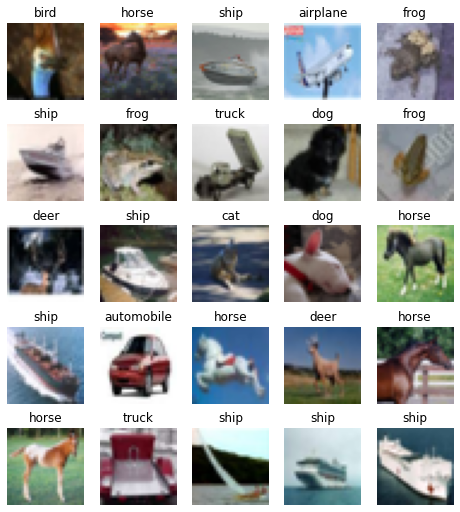

In [6]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = labels[i]
  ax.set_title(classnames[idx])
  
plt.show()

We have the dataset loaded and split into training, validation and test sets, now we can move on to data augmentation

# **DATA PREPROCESSING**

In [7]:
x_train[1,:,:,:].shape # a shape of 1 image is (32,32,3)

(32, 32, 3)

In [8]:
# We should normalize the data
def prep_pixels(train, validation, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = validation.astype('float32')

  train_norm = train_norm / 255
  test_norm = test_norm / 255
  valid_norm = valid_norm / 255

  return train_norm, valid_norm, test_norm


In [23]:
train_norm, valid_norm, test_norm = prep_pixels(x_train,x_val,x_test) # y_train, y_val, y_test - corresponding labels

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,rotation_range=15)

In [10]:
train_datagen.fit(x_train)

# **MODEL BUILDING**

In [19]:
weight_decay = 1e-4
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
 
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
 
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# **MODEL TRAINING**

In [20]:
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.001,decay=1e-6),
    loss="sparse_categorical_crossentropy",
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

In [24]:
start=time()
history = model.fit(train_norm, y_train, epochs=25, batch_size=64, validation_data=(valid_norm, y_val))
end=time()

Epoch 1/25
625/625 [==============================] - 47s 27ms/step - loss: 2.2208 - acc: 0.3641 - val_loss: 1.2937 - val_acc: 0.5766
Epoch 2/25
625/625 [==============================] - 17s 26ms/step - loss: 1.2504 - acc: 0.5899 - val_loss: 1.0227 - val_acc: 0.6654
Epoch 3/25
625/625 [==============================] - 16s 26ms/step - loss: 0.9956 - acc: 0.6742 - val_loss: 0.8349 - val_acc: 0.7280
Epoch 4/25
625/625 [==============================] - 16s 26ms/step - loss: 0.8721 - acc: 0.7147 - val_loss: 0.7701 - val_acc: 0.7594
Epoch 5/25
625/625 [==============================] - 17s 26ms/step - loss: 0.8000 - acc: 0.7453 - val_loss: 0.8134 - val_acc: 0.7513
Epoch 6/25
625/625 [==============================] - 17s 26ms/step - loss: 0.7372 - acc: 0.7674 - val_loss: 0.7745 - val_acc: 0.7655
Epoch 7/25
625/625 [==============================] - 17s 26ms/step - loss: 0.6790 - acc: 0.7902 - val_loss: 0.7274 - val_acc: 0.7819
Epoch 8/25
625/625 [==============================] - 16s 26ms

In [26]:
start=time()
history=model.fit(train_datagen.flow(x_train, y_train, batch_size=64),
          steps_per_epoch=len(x_train) / 64, epochs=50, validation_data=(valid_norm, y_val))
end=time()

Epoch 1/50
625/625 [==============================] - 37s 59ms/step - loss: 0.5980 - acc: 0.8530 - val_loss: 0.6328 - val_acc: 0.8497
Epoch 2/50
625/625 [==============================] - 37s 59ms/step - loss: 0.6029 - acc: 0.8500 - val_loss: 0.5793 - val_acc: 0.8629
Epoch 3/50
625/625 [==============================] - 37s 59ms/step - loss: 0.6017 - acc: 0.8507 - val_loss: 0.6046 - val_acc: 0.8555
Epoch 4/50
625/625 [==============================] - 37s 59ms/step - loss: 0.5967 - acc: 0.8512 - val_loss: 0.6563 - val_acc: 0.8411
Epoch 5/50
625/625 [==============================] - 36s 58ms/step - loss: 0.5967 - acc: 0.8524 - val_loss: 0.6068 - val_acc: 0.8538
Epoch 6/50
625/625 [==============================] - 36s 57ms/step - loss: 0.5996 - acc: 0.8513 - val_loss: 0.5823 - val_acc: 0.8647
Epoch 7/50
625/625 [==============================] - 37s 59ms/step - loss: 0.5892 - acc: 0.8548 - val_loss: 0.6263 - val_acc: 0.8476
Epoch 8/50
625/625 [==============================] - 37s 59ms

In [27]:
print((end-start)//60)

29.0


In [28]:
acc = model.evaluate(test_norm, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5814 - acc: 0.8712


In [29]:
acc

[0.5814161896705627, 0.8712000250816345]

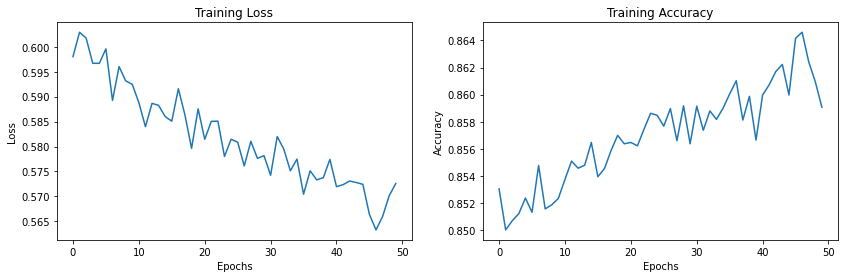

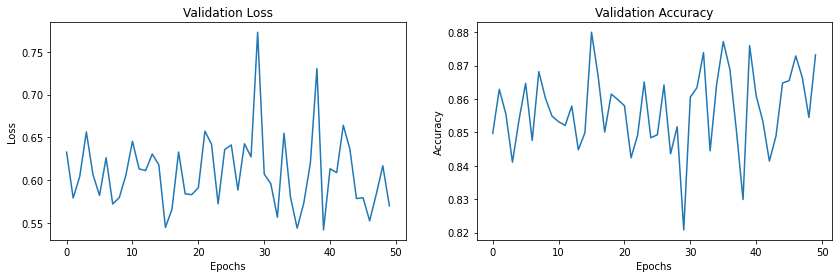

In [30]:
def plot(losses, accuracies, subplot_title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
  
    ax1.plot(losses)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    
    ax1.set_title(subplot_title[0])
  
    ax2.plot(accuracies)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(subplot_title[1])
    
    plt.show()

# Training
plot(history.history['loss'], 
     history.history['acc'], 
     subplot_title=['Training Loss', 'Training Accuracy']
    )

# Validation
plot(history.history['val_loss'], 
     history.history['val_acc'], 
     subplot_title=['Validation Loss', 'Validation Accuracy']
    )

In [31]:
model.save("my_model_from_blog")

INFO:tensorflow:Assets written to: my_model_from_blog/assets


In [32]:
import shutil
shutil.make_archive('my_model_from_blog', 'zip', 'my_model_from_blog')


'/content/my_model_from_blog.zip'